In [2]:
%pip install keras tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
data = pd.read_csv('../Dataset/Thyroid_Diff.csv')

X = data.drop('Recurred', axis=1)
y = data['Recurred']

In [5]:
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [6]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=[np.number]).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X = preprocessor.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/50


c:\Users\arpit\Desktop\dl\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6701 - loss: 0.6454 - val_accuracy: 0.7792 - val_loss: 0.4609
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7309 - loss: 0.5432 - val_accuracy: 0.8052 - val_loss: 0.4042
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7882 - loss: 0.4812 - val_accuracy: 0.8312 - val_loss: 0.3658
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7464 - loss: 0.4787 - val_accuracy: 0.8571 - val_loss: 0.3314
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8045 - loss: 0.4216 - val_accuracy: 0.8831 - val_loss: 0.3007
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8582 - loss: 0.3996 - val_accuracy: 0.8701 - val_loss: 0.2707
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8293 - loss: 0.3780 - val_accuracy: 0.8701 - val_loss: 0.2474
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8472 - loss: 0.3721 - val_accuracy: 0.8831 - val_loss: 0.2252
Ep

In [8]:
model.save("MLPModel/model.h5")

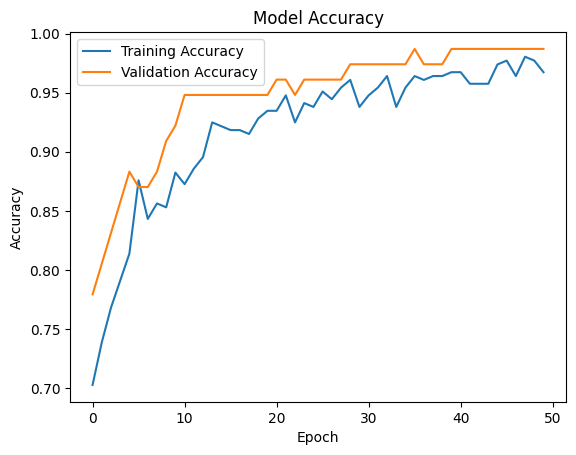

In [12]:
import matplotlib.pyplot as plt 
    
accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']

plt.plot(accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

MLP Accuracy: 0.9870